In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [4]:
# Summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe(include='all'))


Summary statistics of the dataset:
               Name           Age Gender Blood Type Medical Condition  \
count         55500  55500.000000  55500      55500             55500   
unique        49992           NaN      2          8                 6   
top     DAvId muNoZ           NaN   Male         A-         Arthritis   
freq              3           NaN  27774       6969              9308   
mean            NaN     51.539459    NaN        NaN               NaN   
std             NaN     19.602454    NaN        NaN               NaN   
min             NaN     13.000000    NaN        NaN               NaN   
25%             NaN     35.000000    NaN        NaN               NaN   
50%             NaN     52.000000    NaN        NaN               NaN   
75%             NaN     68.000000    NaN        NaN               NaN   
max             NaN     89.000000    NaN        NaN               NaN   

       Date of Admission         Doctor   Hospital Insurance Provider  \
count         

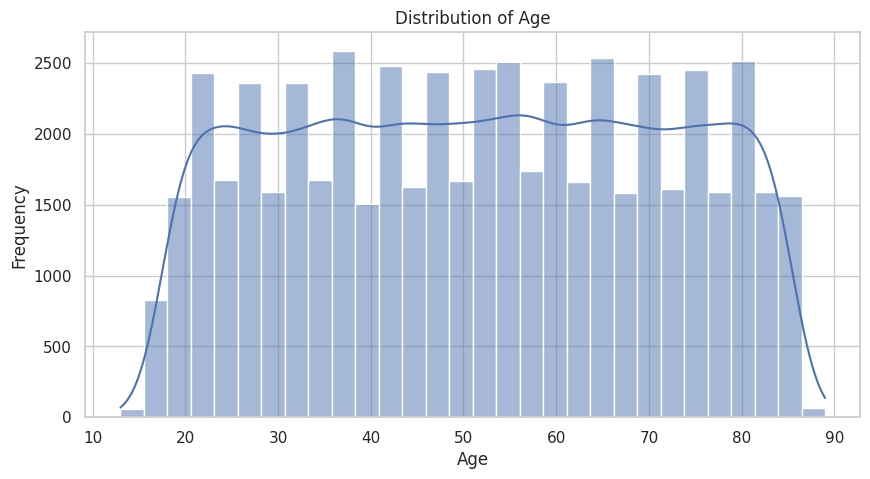

In [5]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

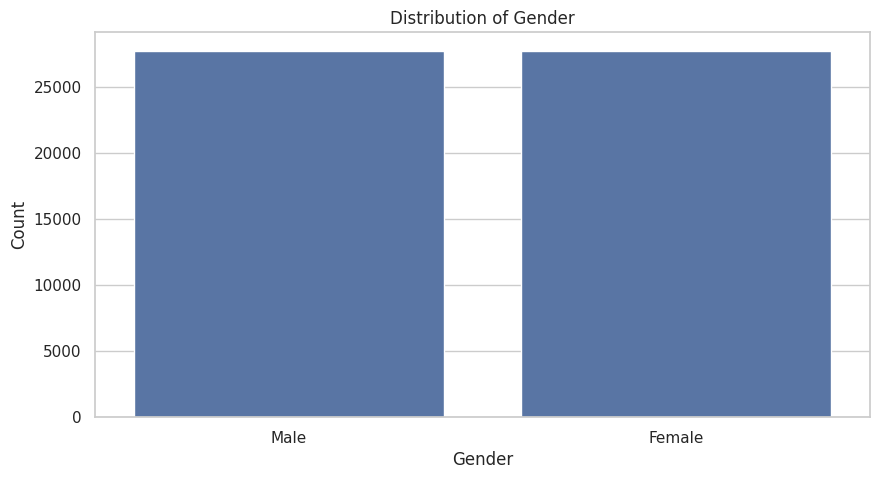

In [6]:
# Distribution of Gender
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

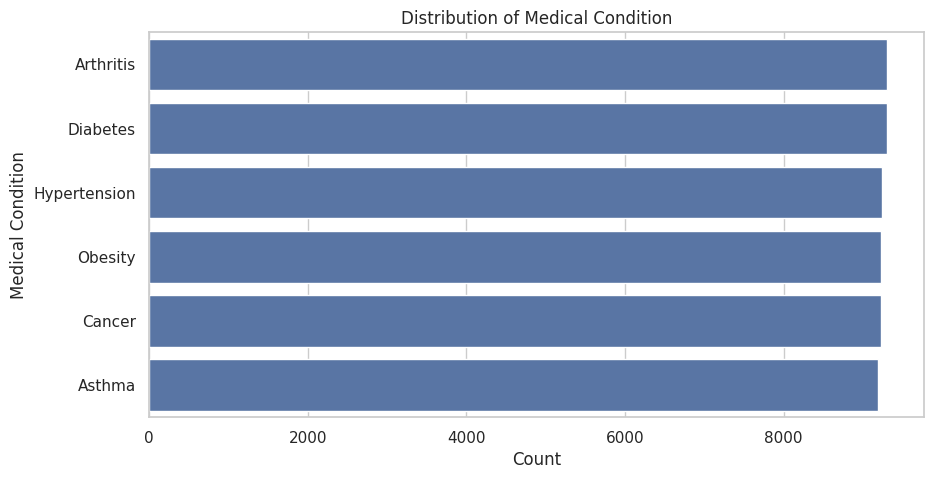

In [7]:
# Distribution of Medical Condition
plt.figure(figsize=(10, 5))
sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index)
plt.title('Distribution of Medical Condition')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

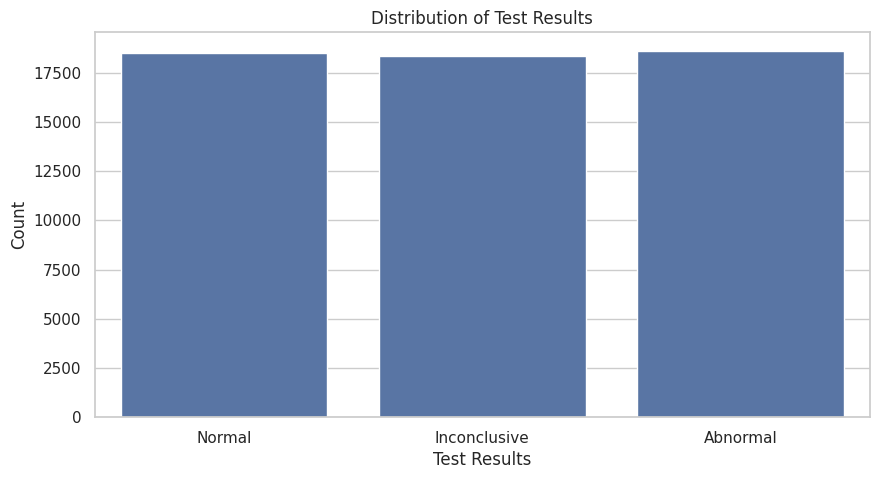

In [8]:
# Distribution of Test Results
plt.figure(figsize=(10, 5))
sns.countplot(x='Test Results', data=df)
plt.title('Distribution of Test Results')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

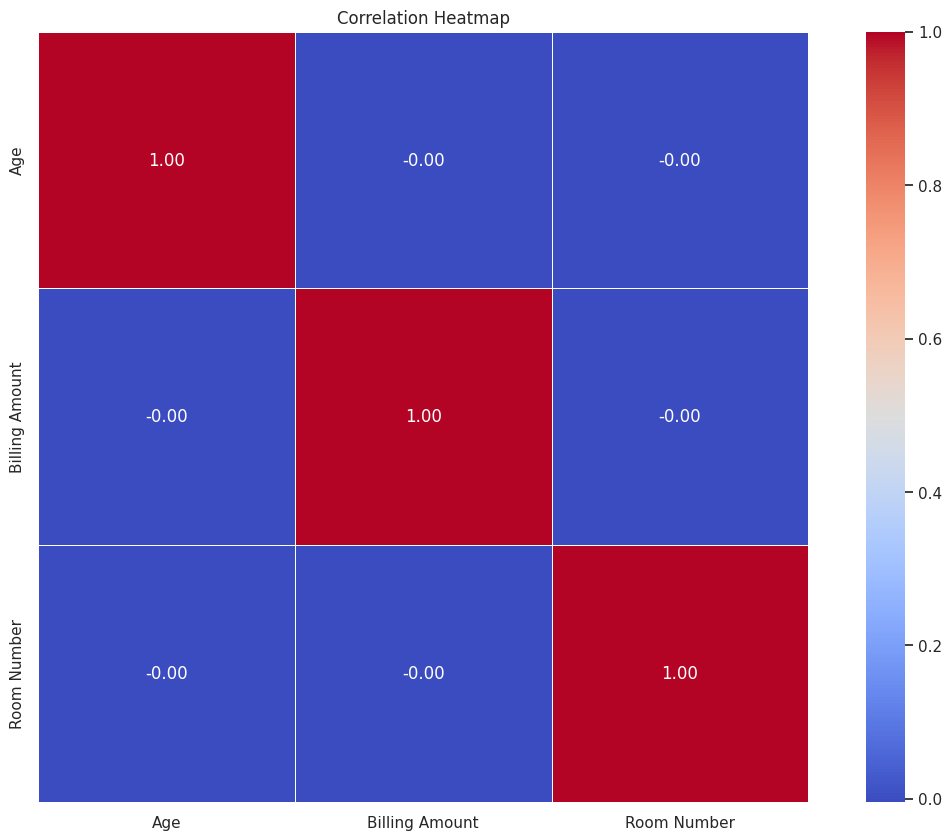

In [11]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [18]:
# Check available columns and find the exact name
print(df.columns)

# If needed, clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Check if 'Test Results' exists in the correlation matrix
if 'Test Results' in correlation_matrix.columns:
    # Sort correlations for 'Test Results' column in descending order
    sorted_corr = correlation_matrix['Test Results'].sort_values(ascending=False)
    print(sorted_corr)
else:
    print("The 'Test Results' column is not numeric or doesn't exist in the correlation matrix.")


Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results'],
      dtype='object')
The 'Test Results' column is not numeric or doesn't exist in the correlation matrix.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [21]:
# Selected features
selected_features = ['Gender', 'Medical Condition', 'Room Number', 'Doctor']

In [22]:
# Features (X) and target variable (y)
X = df[selected_features]
y = df['Test Results']

In [23]:
# Handling missing values for categorical features (you can choose to fill with 'Unknown' or mode for instance)
X.fillna('Unknown', inplace=True)

In [24]:
# Define the preprocessor for encoding categorical variables and scaling numeric ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Room Number']),  # Assuming 'Room Number' is numeric
        ('cat', OneHotEncoder(), ['Gender', 'Medical Condition', 'Doctor'])  # One-hot encode categorical variables
    ])

In [25]:
# Build a pipeline that includes the preprocessor and logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

In [26]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Room Number']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender',
                                                   'Medical Condition',
                                                   'Doctor'])])),
                ('classifier', LogisticRegression())])

In [29]:
# Define the preprocessor for encoding categorical variables and scaling numeric ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Room Number']),  # Assuming 'Room Number' is numeric
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Medical Condition', 'Doctor'])  # One-hot encode categorical variables and handle unknown categories
    ])

In [35]:
# Define the preprocessor for encoding categorical variables and scaling numeric ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Room Number']),  # Assuming 'Room Number' is numeric
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Medical Condition'])  # One-hot encode categorical variables and handle unknown categories
    ])

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming X and y are your original data
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the preprocessor for encoding categorical variables and scaling numeric ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Room Number']),  # Assuming 'Room Number' is numeric
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Medical Condition', 'Doctor'])  # One-hot encode categorical variables and handle unknown categories
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data
X_test = preprocessor.transform(X_test)

# Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.4261261261261261
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.40      0.60      0.48      3726
Inconclusive       0.56      0.24      0.33      3671
      Normal       0.42      0.44      0.43      3703

    accuracy                           0.43     11100
   macro avg       0.46      0.43      0.41     11100
weighted avg       0.46      0.43      0.41     11100

Confusion Matrix:
 [[2235  342 1149]
 [1684  873 1114]
 [1735  346 1622]]


In [39]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

In [41]:
# Making predictions on the test set
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Display the first few predictions
print("Predicted class labels:", y_pred[:10])
print("Predicted probabilities for the positive class:", y_pred_proba[:10])

Predicted class labels: ['Inconclusive' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Inconclusive'
 'Abnormal' 'Normal' 'Abnormal' 'Normal']
Predicted probabilities for the positive class: [0.50824005 0.3283068  0.33197031 0.24490985 0.33362793 0.5091084
 0.33167884 0.33363687 0.33117504 0.38932455]


In [58]:
# Selected features and target variable
selected_features = ['Gender', 'Medical Condition', 'Room Number', 'Doctor']
y = df['Test Results']  # Target variable

# Features (X)
X = df[selected_features]

# Handling missing values (if any)
X.fillna(X.mode().iloc[0], inplace=True)  # Use mode for categorical, mean for numerical

# Creating a preprocessor to handle scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Room Number']),  # Assuming 'Room Number' is numeric
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Medical Condition', 'Doctor'])  # Handle unknown categories
    ])

# Create a pipeline with preprocessing and classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increase max_iter if needed
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fitting the pipeline with the training data
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Making a prediction on new data
new_data = pd.DataFrame([['Male', 'Obesity', 300, 'Doctor A']],  # Use valid categories present in training data
                        columns=['Gender', 'Medical Condition', 'Room Number', 'Doctor'])

# Use the pipeline to preprocess the new data and make predictions
y_pred_new = pipeline.predict(new_data)

print(f"Predicted Value: {y_pred_new[0]}")


Logistic Regression
Accuracy: 0.4261261261261261
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.40      0.60      0.48      3726
Inconclusive       0.56      0.24      0.33      3671
      Normal       0.42      0.44      0.43      3703

    accuracy                           0.43     11100
   macro avg       0.46      0.43      0.41     11100
weighted avg       0.46      0.43      0.41     11100

Confusion Matrix:
 [[2235  342 1149]
 [1684  873 1114]
 [1735  346 1622]]
Predicted Value: Abnormal
